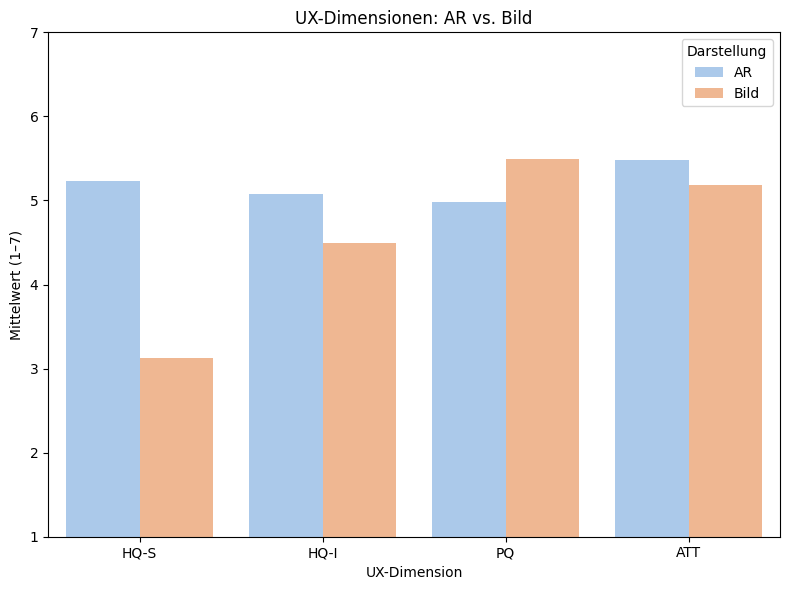

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Excel-Datei laden
df_dim = pd.read_excel("auswertung_dimensionen.xlsx")

# Long-Format vorbereiten
df_plot = df_dim.melt(
    id_vars="Dimension",
    value_vars=["Mittelwert_AR", "Mittelwert_Bild"],
    var_name="Bedingung",
    value_name="Wert"
)

# Spaltennamen vereinfachen
df_plot["Bedingung"] = df_plot["Bedingung"].str.replace("Mittelwert_", "")

# Diagramm zeichnen
plt.figure(figsize=(8, 6))
sns.barplot(data=df_plot, x="Dimension", y="Wert", hue="Bedingung", palette="pastel")
plt.title("UX-Dimensionen: AR vs. Bild")
plt.ylabel("Mittelwert (1–7)")
plt.xlabel("UX-Dimension")
plt.ylim(1, 7)
plt.legend(title="Darstellung")
plt.tight_layout()
plt.show()


/var/folders/93/jwm_jtfs4lbgvw1yn862my5m0000gn/T/ipykernel_8707/546330418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


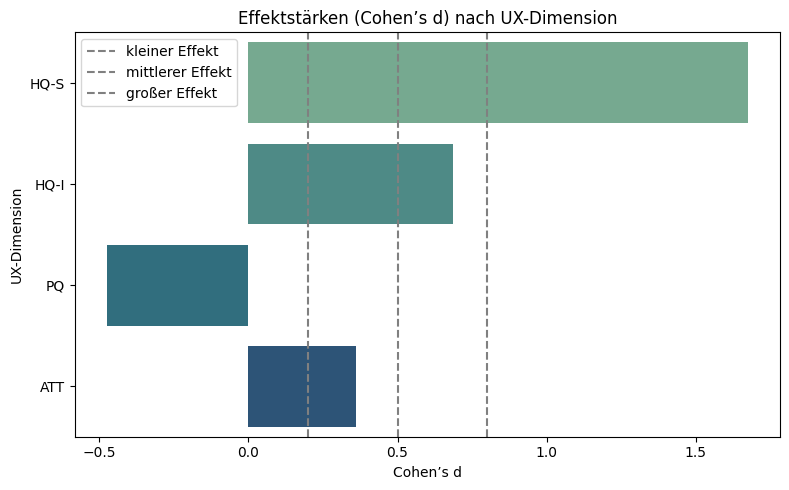

In [2]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_dim,
    x="Cohen's d",
    y="Dimension",
    palette="crest",
    orient='h'
)
plt.axvline(0.2, color='grey', linestyle='--', label='kleiner Effekt')
plt.axvline(0.5, color='grey', linestyle='--', label='mittlerer Effekt')
plt.axvline(0.8, color='grey', linestyle='--', label='großer Effekt')
plt.title("Effektstärken (Cohen’s d) nach UX-Dimension")
plt.xlabel("Cohen’s d")
plt.ylabel("UX-Dimension")
plt.legend()
plt.tight_layout()
plt.show()


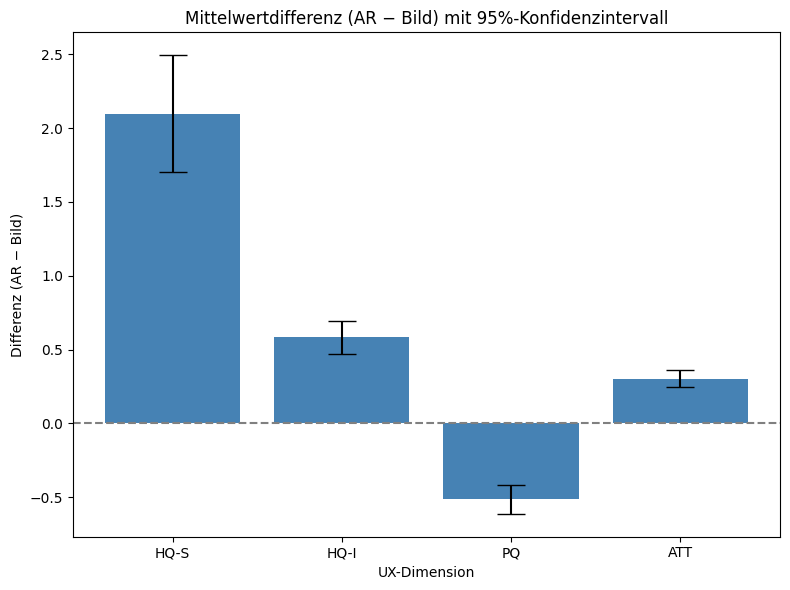

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 📄 Excel-Datei laden
df = pd.read_excel("auswertung_dimensionen.xlsx")

# 🧮 Differenz AR - Bild
df["Differenz"] = df["Mittelwert_AR"] - df["Mittelwert_Bild"]

# ❗ Beispielweise Konfidenzintervall schätzen (wenn keine Rohdaten mehr verfügbar)
# Annahme: n = 28 Teilnehmende (anpassen falls nötig)
n = 28
df["Standardabweichung"] = np.abs(df["Differenz"]) / 1.96  # grobe Näherung
df["CI95"] = 1.96 * (df["Standardabweichung"] / np.sqrt(n))

# 📊 Diagramm erzeugen
plt.figure(figsize=(8, 6))
bars = plt.bar(
    df["Dimension"],
    df["Differenz"],
    yerr=df["CI95"],
    capsize=10,
    color="steelblue"
)

# ➖ Referenzlinie bei 0
plt.axhline(0, color="gray", linestyle="--")

# 📋 Beschriftung & Layout
plt.title("Mittelwertdifferenz (AR − Bild) mit 95%-Konfidenzintervall")
plt.ylabel("Differenz (AR − Bild)")
plt.xlabel("UX-Dimension")
plt.tight_layout()

# 📈 Diagramm anzeigen
plt.show()


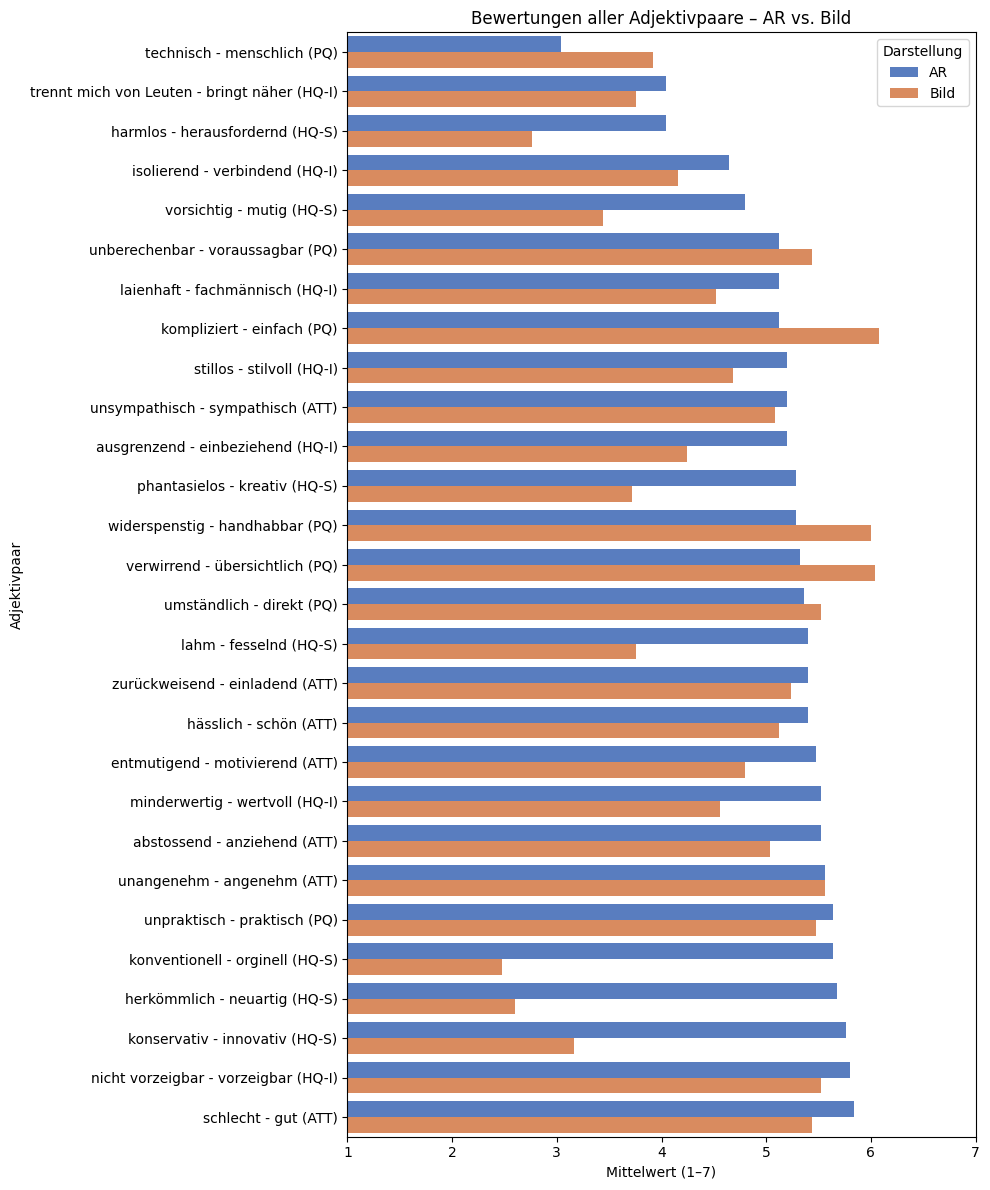

In [3]:
df_items = pd.read_excel("auswertung_items.xlsx")

# Long-Format
df_items_plot = df_items.melt(
    id_vars="Item",
    value_vars=["Mittelwert_AR", "Mittelwert_Bild"],
    var_name="Bedingung",
    value_name="Wert"
)
df_items_plot["Bedingung"] = df_items_plot["Bedingung"].str.replace("Mittelwert_", "")

# Optional: sortieren
order = df_items.sort_values("Mittelwert_AR")["Item"]

plt.figure(figsize=(10, 12))
sns.barplot(data=df_items_plot, y="Item", x="Wert", hue="Bedingung", palette="muted", order=order)
plt.title("Bewertungen aller Adjektivpaare – AR vs. Bild")
plt.xlabel("Mittelwert (1–7)")
plt.ylabel("Adjektivpaar")
plt.xlim(1, 7)
plt.legend(title="Darstellung")
plt.tight_layout()
plt.show()


/var/folders/93/jwm_jtfs4lbgvw1yn862my5m0000gn/T/ipykernel_8707/1938874734.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_signifikant, y="Item", x="Differenz", palette="Greens")


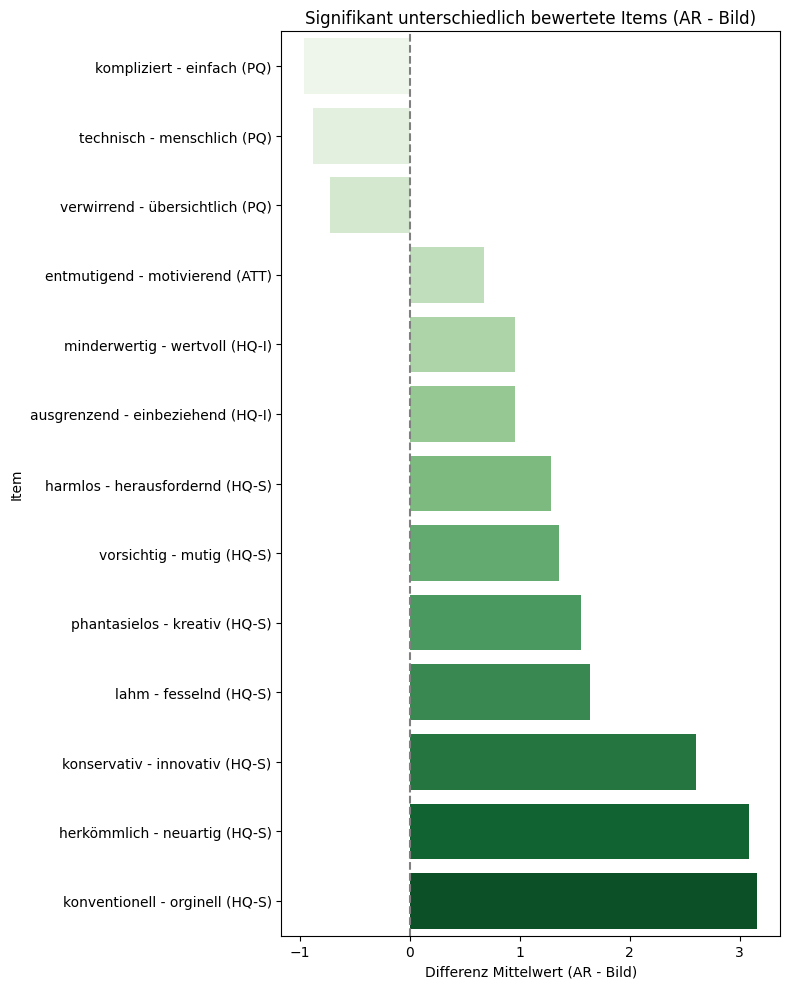

In [4]:
# Nur signifikante Items
df_signifikant = df_items[df_items["p-Wert"] < 0.05].copy()
df_signifikant["Differenz"] = df_signifikant["Mittelwert_AR"] - df_signifikant["Mittelwert_Bild"]

# Sortiert nach Effekt
df_signifikant = df_signifikant.sort_values("Differenz")

plt.figure(figsize=(8, 10))
sns.barplot(data=df_signifikant, y="Item", x="Differenz", palette="Greens")
plt.axvline(0, color='gray', linestyle='--')
plt.title("Signifikant unterschiedlich bewertete Items (AR - Bild)")
plt.xlabel("Differenz Mittelwert (AR - Bild)")
plt.ylabel("Item")
plt.tight_layout()
plt.show()
